# Técnicas de programação

### Análise exploratória de Dados

#### Turma 1105 - Vem Ser Tech | Dados



##### Alunos: Alan Henrique C. Silva, Iago Fonseca M. Pereira, Lisnane Vitória de Oliveira, Márcia Oliveira, Tamira Aboganem, Wilza V. da Silva

### -Introdução


No contexto do avanço tecnológico e das transformações digitais no sistema financeiro, o Banco Central do Brasil tem desempenhado um papel fundamental na modernização dos meios de pagamento no país. Como parte desse esforço, o Sistema de Pagamentos Instantâneos (SPI) foi lançado em novembro de 2020, permitindo transações financeiras em tempo real, 24 horas por dia, todos os dias do ano. Nesse contexto, o Pix, como é popularmente conhecido, surgiu como uma revolução nos serviços de pagamento, comodidade e agilidade tanto para pessoas físicas quanto jurídicas.

Este projeto de análise exploratória tem como objetivo examinar os dados fornecidos pelo Banco Central do Brasil sobre as transações PIX, considerando a perspectiva dos pagadores e recebedores, segmentados por município, estado e região. Os dados, provenientes de fontes oficiais, refletem o volume e o valor das transações PIX líquidas ao longo de vários meses.

Para iniciar vamos importar as bibliotecas nessecessárias para realizarmos a Análise exploratória do dataset escolhido pela equipe.

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Em seguida vamos ler nosso dataset, que está em formato CSV. É um dataset de dados sobre o PIX do ano de 2023, obtido diretamente do site do Banco Central, por isso o chamaremos de pix. Para conhecê-lo um pouco melhor vamos chamar a função head para descobrir os nomes das colunas.

In [ ]:
pix = pd.read_csv('https://raw.githubusercontent.com/Grupo-3-Logica-de-Programacao-1/Logica-de-Programacao-1/main/C%C3%B3digo/transacoes_pix_por_municipio.csv')
pix.head(10)

,AnoMes,Municipio,Estado,Regiao,VL_PagadorPF,QT_PagadorPF,VL_PagadorPJ,QT_PagadorPJ,VL_RecebedorPF,QT_RecebedorPF,VL_RecebedorPJ,QT_RecebedorPJ
0,202309,MARANHÃOZINHO,MARANHÃO,NORDESTE,"14629089,96",118012,"2594844,9",3523,"13878844,64",76758,"1873092,67",11226
1,202304,ANHANGUERA,GOIÁS,CENTRO-OESTE,"1708642,5",7693,"126968,35",321,"1332932,68",5671,"184304,66",626
2,202308,ÁGUA PRETA,PERNAMBUCO,NORDESTE,"36665061,57",283432,"3299205,72",4571,"36552276,58",204404,"2545560,16",12596
3,202303,RIANÁPOLIS,GOIÁS,CENTRO-OESTE,"12852216,68",42018,"6764153,94",3679,"14249576,94",35588,"7553439,12",6877
4,202309,BURITIZAL,SÃO PAULO,SUDESTE,"9308600,54",39252,"9335570,98",4706,"11641800,13",24401,"16969313,88",9531
5,202304,TRÊS LAGOAS,MATO GROSSO DO SUL,CENTRO-OESTE,"354599097,31",1617312,"458202225,72",163621,"355842085,48",1143848,"356962623,46",347464
6,202310,RIO DE JANEIRO,RIO DE JANEIRO,SUDESTE,"23710124236,73",121202986,"52377533885,85",9036597,"23723295932,22",88341353,"45922450051,4",43280547
7,202305,SOCORRO DO PIAUÍ,PIAUÍ,NORDESTE,"5275110,83",39865,"1194141,37",732,"4682481,52",26405,"1173461,39",1942
8,202303,PARAMOTI,CEARÁ,NORDESTE,"13348009,28",94718,"1121331,07",1516,"13334103,86",81082,"973924,47",4752
9,202308,SANTO ANTÔNIO DO LEVERGER,MATO GROSSO,CENTRO-OESTE,"31249251,54",232859,"20037944,13",13228,"31998954,08",151651,"18228694,95",24298


Agora vamos vizualizar as ultimas linhas do dataset.

In [ ]:
pix.tail(10)

,AnoMes,Municipio,Estado,Regiao,VL_PagadorPF,QT_PagadorPF,VL_PagadorPJ,QT_PagadorPJ,VL_RecebedorPF,QT_RecebedorPF,VL_RecebedorPJ,QT_RecebedorPJ
77956,202304,CAPIM BRANCO,MINAS GERAIS,SUDESTE,"16122411,34",91625,"11844173,74",6984,"17221594,95",65275,"9232291,27",12855
77957,202309,CAPIM BRANCO,MINAS GERAIS,SUDESTE,"20067119,85",115512,"12116552,37",9757,"20527521,04",75934,"9146844,2",16821
77958,202402,CAPIM BRANCO,MINAS GERAIS,SUDESTE,"11367306,09",72463,"6338583,43",5042,"12270597,16",45465,"5238037,92",10194
77959,202302,CAPIM BRANCO,MINAS GERAIS,SUDESTE,"14725309,05",78968,"8876630,33",6608,"15506096,98",57851,"5571897,48",11635
77960,202307,CAPIM BRANCO,MINAS GERAIS,SUDESTE,"18671743,32",106312,"11476316,95",9373,"19289480,46",72862,"7610226,35",15839
77961,202311,CAPIM BRANCO,MINAS GERAIS,SUDESTE,"22270961,96",131572,"12560266,46",10522,"22272282,34",83379,"10369474,72",19241
77962,202308,CAPIM BRANCO,MINAS GERAIS,SUDESTE,"22103994,19",112301,"16026267,78",9643,"23646144,85",75444,"10879131,03",16476
77963,202301,CAPIM BRANCO,MINAS GERAIS,SUDESTE,"15374137,9",79152,"10503574,28",6479,"15462403,88",57328,"5470300,32",10854
77964,202310,CAPIM BRANCO,MINAS GERAIS,SUDESTE,"21715392,98",125798,"10604707,59",10201,"21663408,17",80974,"9426055,35",18080
77965,202303,CAPIM BRANCO,MINAS GERAIS,SUDESTE,"17100879,37",92392,"10012675,04",7703,"18279061,73",66831,"7881231,27",13839


Neste item vamos verificar quantas linhas e quantas colunas o nosso dataset possui utilizando o shape().

In [ ]:
print('A base de dados apresenta {} instâncias e {} atributos'.format(pix.shape[0], pix.shape[1]))

A base de dados apresenta 77966 instâncias e 12 atributos


O próximo passo é obter as estatísticas descritivas dos dados quantitativos através do describe()

In [ ]:
pix.describe().applymap(lambda x:'{:.2f}'.format(x))

,AnoMes,QT_PagadorPF,QT_PagadorPJ,QT_RecebedorPF,QT_RecebedorPJ
count,77966.00,77966.00,77966.00,77966.00,77966.00
mean,202320.07,481438.41,56953.99,346832.61,191559.79
std,33.40,3389456.46,1218810.19,2493818.29,4748772.32
min,202301.00,2074.00,18.00,1183.00,41.00
25%,202304.00,40290.25,1677.00,26627.00,4569.00
50%,202307.50,93195.50,4317.00,63359.00,12174.50
75%,202311.00,237618.25,14000.75,165262.50,38892.75
max,202402.00,228750540.00,126799793.00,156754806.00,512794393.00


Agora através do info() vamos obter algumas informações úteis sobre o dataset.

In [ ]:
pix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77966 entries, 0 to 77965
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AnoMes          77966 non-null  int64 
 1   Municipio       77966 non-null  object
 2   Estado          77966 non-null  object
 3   Regiao          77966 non-null  object
 4   VL_PagadorPF    77966 non-null  object
 5   QT_PagadorPF    77966 non-null  int64 
 6   VL_PagadorPJ    77966 non-null  object
 7   QT_PagadorPJ    77966 non-null  int64 
 8   VL_RecebedorPF  77966 non-null  object
 9   QT_RecebedorPF  77966 non-null  int64 
 10  VL_RecebedorPJ  77966 non-null  object
 11  QT_RecebedorPJ  77966 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 7.1+ MB


### -Tratamento dos Dados

Identificando valores únicos nos dados categoricos dos atributos Estado e Região

In [ ]:
print(pix["Estado"].unique())
print(pix["Regiao"].unique())

['MARANHÃO' 'GOIÁS' 'PERNAMBUCO' 'SÃO PAULO' 'MATO GROSSO DO SUL'
 'RIO DE JANEIRO' 'PIAUÍ' 'CEARÁ' 'MATO GROSSO' 'MINAS GERAIS' 'BAHIA'
 'SERGIPE' 'RIO GRANDE DO SUL' 'TOCANTINS' 'ALAGOAS' 'PARÁ'
 'ESPÍRITO SANTO' 'SANTA CATARINA' 'RIO GRANDE DO NORTE' 'PARAÍBA'
 'RONDÔNIA' 'PARANÁ' 'RORAIMA' 'AMAZONAS' 'ACRE' 'AMAPÁ' 'NAO INFORMADO'
 'DISTRITO FEDERAL']
['NORDESTE' 'CENTRO-OESTE' 'SUDESTE' 'SUL' 'NORTE' 'Nao informado']


Observamos que em estado e em região apareceu o valor "Não informado", para fins da nossa análise neste projeto vamos desconsiderar estes dados, eleiminando as linhas com o valor "Não Informado".

In [ ]:

pix["Estado"] = pix["Estado"].replace('NAO INFORMADO', np.nan)
pix["Regiao"] = pix["Regiao"].replace('Nao informado', np.nan)

pix = pix.dropna(subset=["Estado"])
pix = pix.dropna(subset=["Regiao"])
print(pix["Estado"].unique())
print(pix["Regiao"].unique())

['MARANHÃO' 'GOIÁS' 'PERNAMBUCO' 'SÃO PAULO' 'MATO GROSSO DO SUL'
 'RIO DE JANEIRO' 'PIAUÍ' 'CEARÁ' 'MATO GROSSO' 'MINAS GERAIS' 'BAHIA'
 'SERGIPE' 'RIO GRANDE DO SUL' 'TOCANTINS' 'ALAGOAS' 'PARÁ'
 'ESPÍRITO SANTO' 'SANTA CATARINA' 'RIO GRANDE DO NORTE' 'PARAÍBA'
 'RONDÔNIA' 'PARANÁ' 'RORAIMA' 'AMAZONAS' 'ACRE' 'AMAPÁ'
 'DISTRITO FEDERAL']
['NORDESTE' 'CENTRO-OESTE' 'SUDESTE' 'SUL' 'NORTE']


Nesta etapa vamos converter as colunas quantitativas que estão como'object' para 'float64'.

In [ ]:
colunas_para_converter = ['VL_PagadorPF', 'VL_PagadorPJ', 'VL_RecebedorPF', 'VL_RecebedorPJ']
for coluna in colunas_para_converter:
    pix[coluna] = pix[coluna].str.replace(',', '.')
    pix[coluna] = pix[coluna].astype('float64')

Agora vamos vizualiazar novamente as infromaçãoes para verificar se as colunas foram devidamente convertidas

In [ ]:
pix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77952 entries, 0 to 77965
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AnoMes          77952 non-null  int64  
 1   Municipio       77952 non-null  object 
 2   Estado          77952 non-null  object 
 3   Regiao          77952 non-null  object 
 4   VL_PagadorPF    77952 non-null  float64
 5   QT_PagadorPF    77952 non-null  int64  
 6   VL_PagadorPJ    77952 non-null  float64
 7   QT_PagadorPJ    77952 non-null  int64  
 8   VL_RecebedorPF  77952 non-null  float64
 9   QT_RecebedorPF  77952 non-null  int64  
 10  VL_RecebedorPJ  77952 non-null  float64
 11  QT_RecebedorPJ  77952 non-null  int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 7.7+ MB


 Verificação boleana de prensença de NA's em cada atributo

In [ ]:
pix.isnull().any()

AnoMes            False
Municipio         False
Estado            False
Regiao            False
VL_PagadorPF      False
QT_PagadorPF      False
VL_PagadorPJ      False
QT_PagadorPJ      False
VL_RecebedorPF    False
QT_RecebedorPF    False
VL_RecebedorPJ    False
QT_RecebedorPJ    False
dtype: bool

 Verificação de quantidade de NA's em cada atributo

In [ ]:
pix.isnull().sum()

AnoMes            0
Municipio         0
Estado            0
Regiao            0
VL_PagadorPF      0
QT_PagadorPF      0
VL_PagadorPJ      0
QT_PagadorPJ      0
VL_RecebedorPF    0
QT_RecebedorPF    0
VL_RecebedorPJ    0
QT_RecebedorPJ    0
dtype: int64

Vamos desconsiderar os dados de 2024, para trabalhar com o ano completo de 2023.

In [ ]:
pix["AnoMes"] = pix["AnoMes"].replace(202401, np.nan)
pix["AnoMes"] = pix["AnoMes"].replace(202402, np.nan)
pix = pix.dropna(subset=["AnoMes"])
print(pix["AnoMes"].unique())

Distribuição de Frequência, atributo "Estado"

<ipython-input-53-0561ea3c13e3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Estado', data=pix, order=pix['Estado'].value_counts().index, palette=palette)


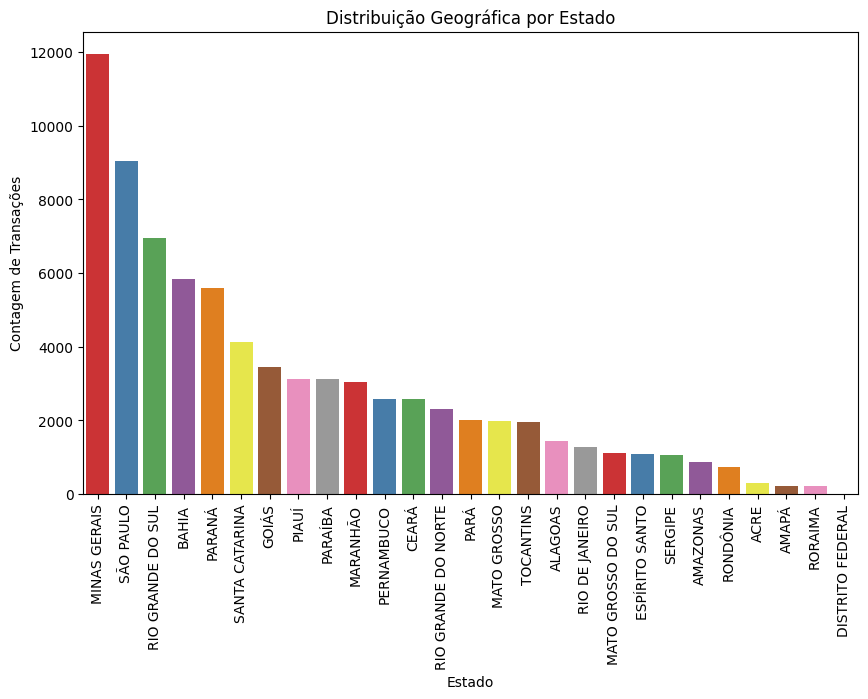

In [ ]:
palette = sns.color_palette('Set1', len(pix['Estado'].unique()))

plt.figure(figsize=(10, 6))
sns.countplot(x='Estado', data=pix, order=pix['Estado'].value_counts().index, palette=palette)
plt.title('Distribuição Geográfica por Estado')
plt.xlabel('Estado')
plt.ylabel('Contagem de Transações')
plt.xticks(rotation=90)
plt.show()

Distribuição de Frequência, atributo "Regiao"

<ipython-input-52-9833d6c3a9f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Regiao', data=pix, order=pix['Regiao'].value_counts().index, palette=palette)


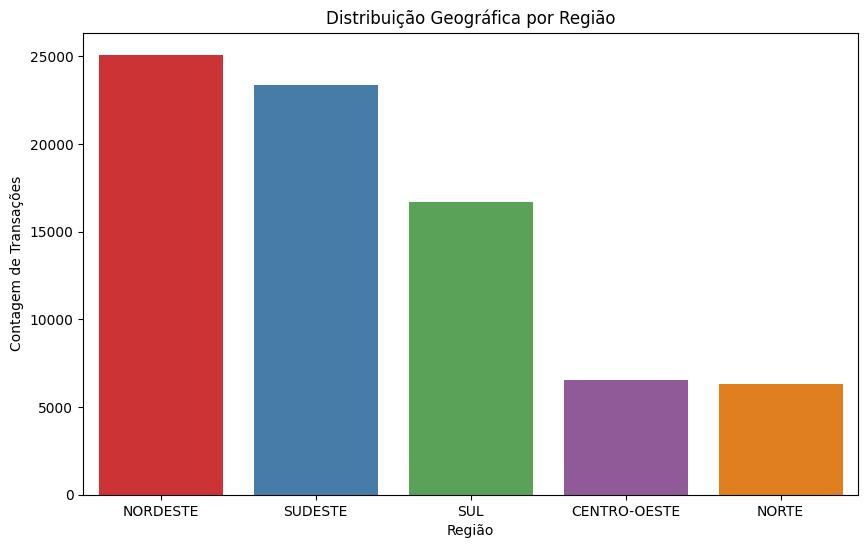

In [ ]:
palette = sns.color_palette('Set1', len(pix['Regiao'].unique()))

plt.figure(figsize=(10, 6))
sns.countplot(x='Regiao', data=pix, order=pix['Regiao'].value_counts().index, palette=palette)
plt.title('Distribuição Geográfica por Região')
plt.xlabel('Região')
plt.ylabel('Contagem de Transações')
plt.show()

### -Distribuição dos dados e Identificação de outliers

Plotando boxplot do atributo de valor pagador de pessoa física

<Axes: >

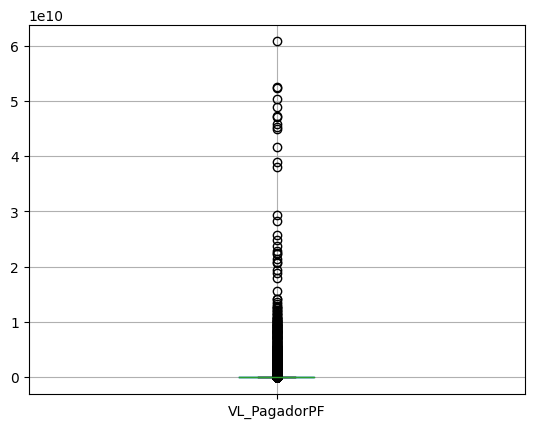

In [ ]:
pix.boxplot(['VL_PagadorPF'])

Plotando boxplot do atributo de valor pagador de pessoa jurídica

<Axes: >

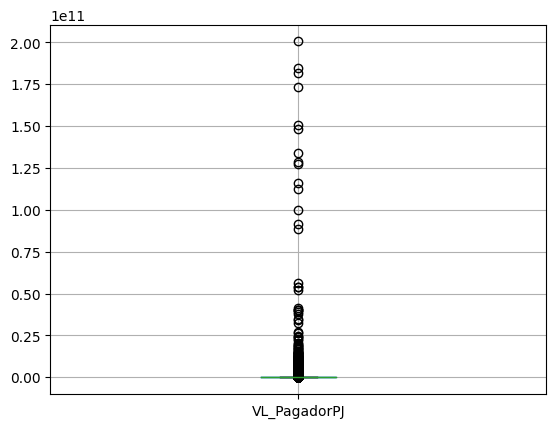

In [ ]:
pix.boxplot(['VL_PagadorPJ'])

Plotando boxplot do atributo de valor pagador de pessoa física

<Axes: >

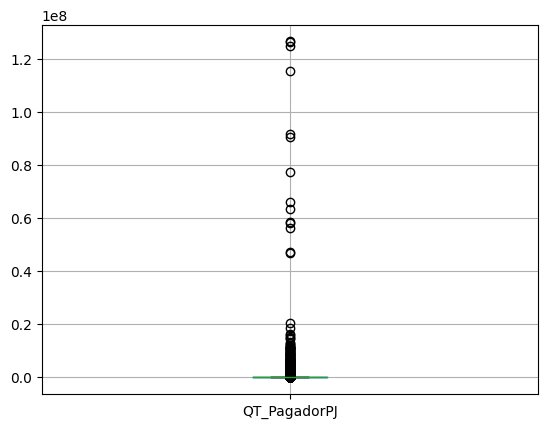

In [ ]:

pix.boxplot(['QT_PagadorPJ'])

 Plotando boxplot do atributo de quantidade pagador de pessoa física



<Axes: >

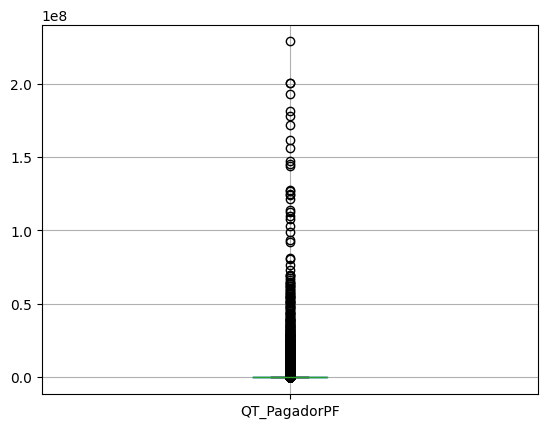

In [ ]:
pix.boxplot(['QT_PagadorPF'])

### -Correlação

Vizualizando a correlação entre os atributos.

<ipython-input-22-d4ad42e2b538>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = pix.corr()


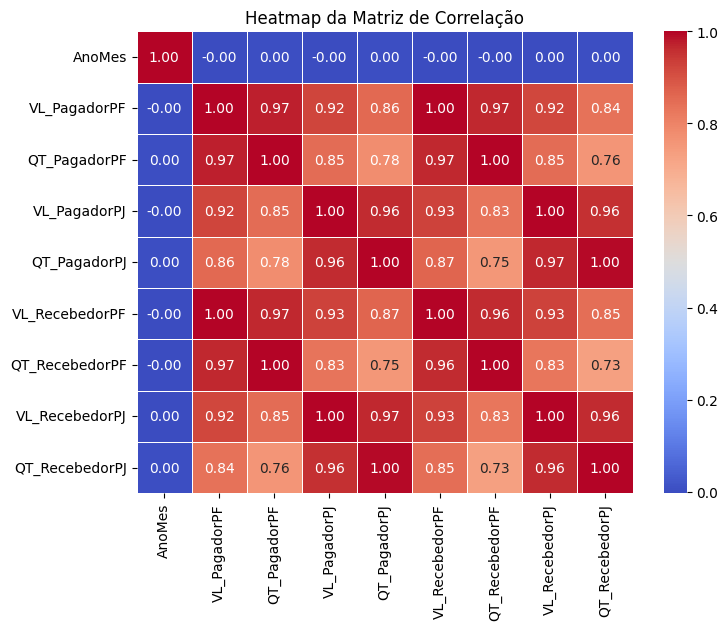

In [ ]:
heatmap = pix.corr()

heatmap_formatado = heatmap.applymap(lambda x: '{:.2f}'.format(x))

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap, annot=heatmap_formatado, cmap='coolwarm', fmt='s', linewidths=.5)
plt.title('Heatmap da Matriz de Correlação')
plt.show()



In [ ]:
total_transacoes_por_municipio_qt = pix.groupby('Municipio')[['QT_PagadorPF', 'QT_PagadorPJ', 'QT_RecebedorPF', 'QT_RecebedorPJ']].sum()

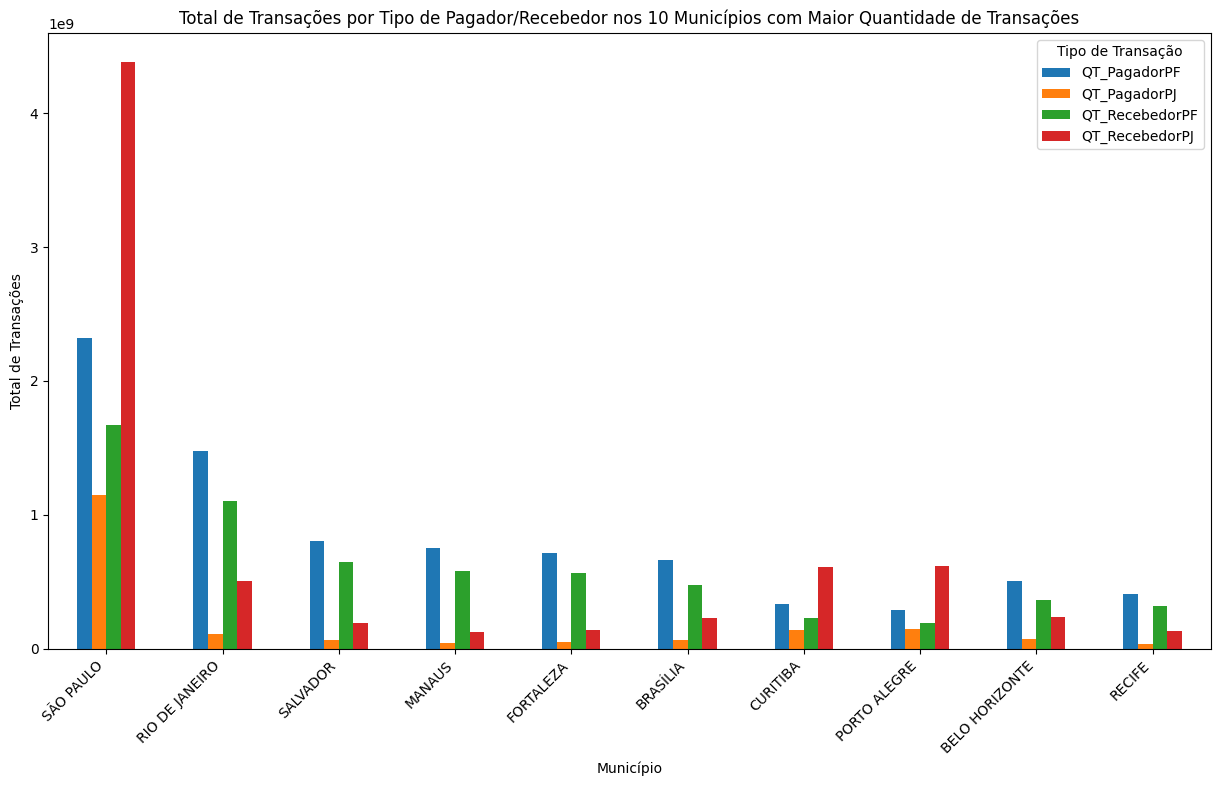

In [ ]:
#visualizando os top 10 municipios que mais usaram o PIX
top_10_municipios_qt = total_transacoes_por_municipio_qt.sum(axis=1).nlargest(10).index
total_transacoes_por_municipio_top_10_qt = total_transacoes_por_municipio_qt.loc[top_10_municipios_qt]
total_transacoes_por_municipio_top_10_qt.plot(kind='bar', figsize=(15, 8))
plt.title('Total de Transações por Tipo de Pagador/Recebedor nos 10 Municípios com Maior Quantidade de Transações')
plt.xlabel('Município')
plt.ylabel('Total de Transações')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Transação')
plt.show()

In [ ]:
total_transacoes_por_municipio_vl = pix.groupby('Municipio')[['VL_PagadorPF', 'VL_PagadorPJ', 'VL_RecebedorPF', 'VL_RecebedorPJ']].sum()

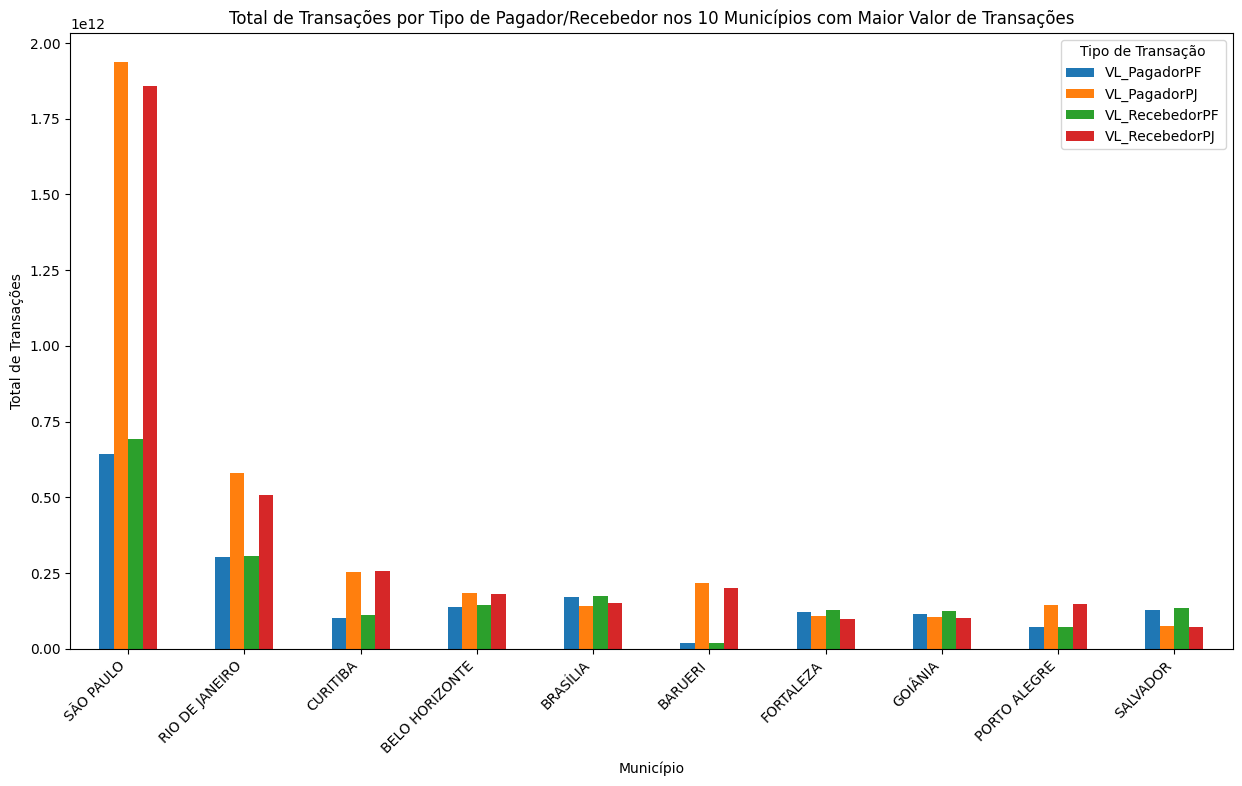

In [ ]:
#visualizando os top 10 municipios com os valores de PIX mais altos
top_10_municipios_vl = total_transacoes_por_municipio_vl.sum(axis=1).nlargest(10).index
total_transacoes_por_municipio_top_10_vl = total_transacoes_por_municipio_vl.loc[top_10_municipios_vl]
total_transacoes_por_municipio_top_10_vl.plot(kind='bar', figsize=(15, 8))
plt.title('Total de Transações por Tipo de Pagador/Recebedor nos 10 Municípios com Maior Valor de Transações')
plt.xlabel('Município')
plt.ylabel('Total de Transações')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Transação')
plt.show()

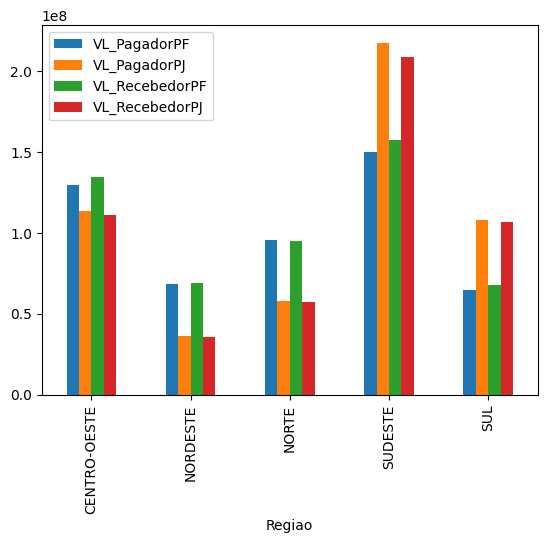

In [ ]:
valor_medio_por_regiao = pix.groupby('Regiao')[['VL_PagadorPF', 'VL_PagadorPJ', 'VL_RecebedorPF', 'VL_RecebedorPJ']].mean().plot.bar()

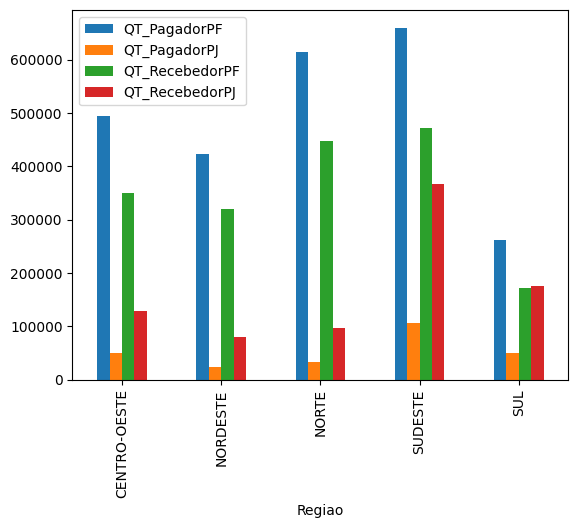

In [ ]:
qtdade_media_por_regiao = pix.groupby('Regiao')[['QT_PagadorPF', 'QT_PagadorPJ', 'QT_RecebedorPF', 'QT_RecebedorPJ']].mean().plot.bar()

In [ ]:
#trabalhando com os meses do ano
pix_janeiro = pix.loc[pix["AnoMes"] == 202301]
pix_fevereiro = pix.loc[pix["AnoMes"] == 202302]
pix_marco = pix.loc[pix["AnoMes"] == 202303]
pix_abril = pix.loc[pix["AnoMes"] == 202304]
pix_maio = pix.loc[pix["AnoMes"] == 202305]
pix_junho = pix.loc[pix["AnoMes"] == 202306]
pix_julho = pix.loc[pix["AnoMes"] == 202307]
pix_agosto = pix.loc[pix["AnoMes"] == 202308]
pix_setembro = pix.loc[pix["AnoMes"] == 202309]
pix_outubro = pix.loc[pix["AnoMes"] == 202310]
pix_novembro = pix.loc[pix["AnoMes"] == 202311]
pix_dezembro = pix.loc[pix["AnoMes"] == 202312]

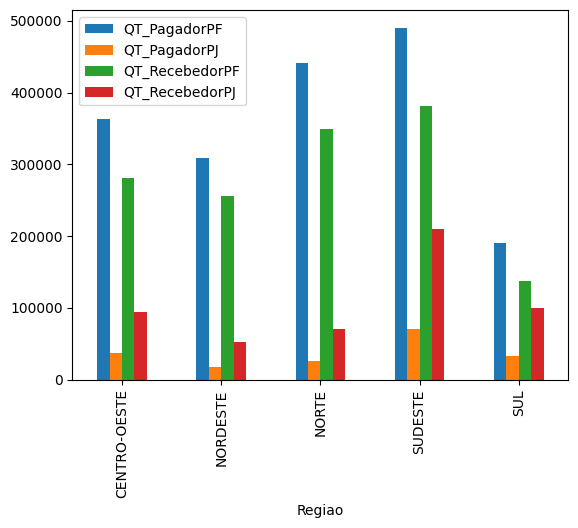

In [ ]:
qtdade_media_janeiro = pix_janeiro.groupby('Regiao')[['QT_PagadorPF', 'QT_PagadorPJ', 'QT_RecebedorPF', 'QT_RecebedorPJ']].mean().plot.bar()

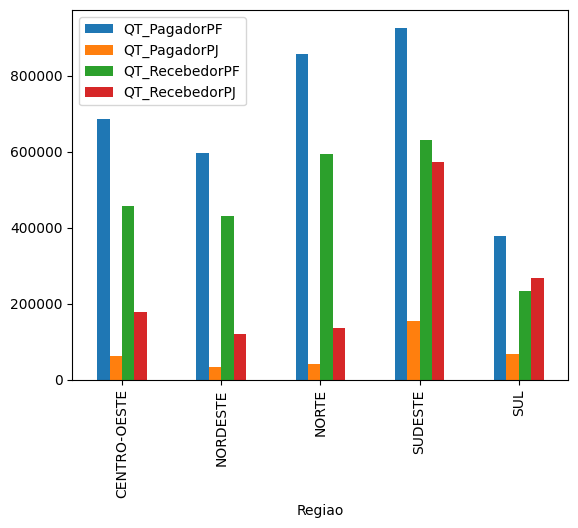

In [ ]:
qtdade_media_dezembro = pix_dezembro.groupby('Regiao')[['QT_PagadorPF', 'QT_PagadorPJ', 'QT_RecebedorPF', 'QT_RecebedorPJ']].mean().plot.bar()

Agora vamos gerar um gráfico para analisar a tendência dos valores de pix ao longo do ano de 2023

Primeiramente vamos extrair o ano e o mês da coluna 'AnoMes'

In [ ]:
pix['AnoMes'] = pd.to_datetime(pix['AnoMes'], format='%Y%m')

Agora vamos filtrar os dados para que seja considerado apenas o ano de 2023.

In [ ]:
df = pix[pix['AnoMes'].dt.year < 2024]

Neste ponto vamos converter o período para string.

In [ ]:
df['AnoMes'] = df['AnoMes'].dt.to_period('M').astype(str)

<ipython-input-35-32521a1abd64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AnoMes'] = df['AnoMes'].dt.to_period('M').astype(str)


Agora utilizando o groupby vamos agrupar os dados por mês e calcular o valor total das transações em cada mês para cada coluna

In [ ]:

valores_por_mes = df.groupby('AnoMes')[['VL_PagadorPF', 'VL_PagadorPJ', 'VL_RecebedorPF', 'VL_RecebedorPJ']].sum()

Agora vamos plotar o gráfico para cada coluna.

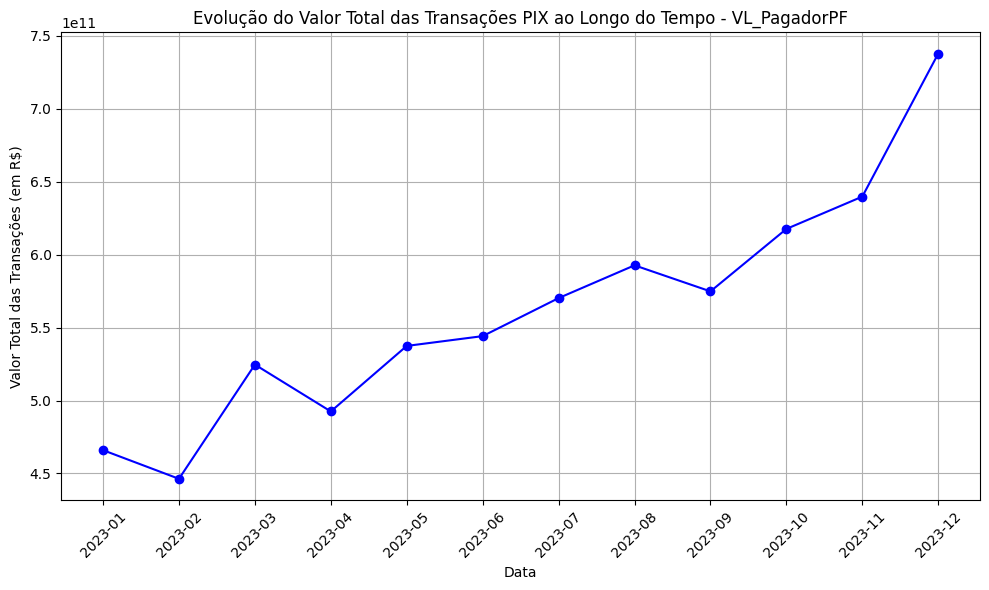

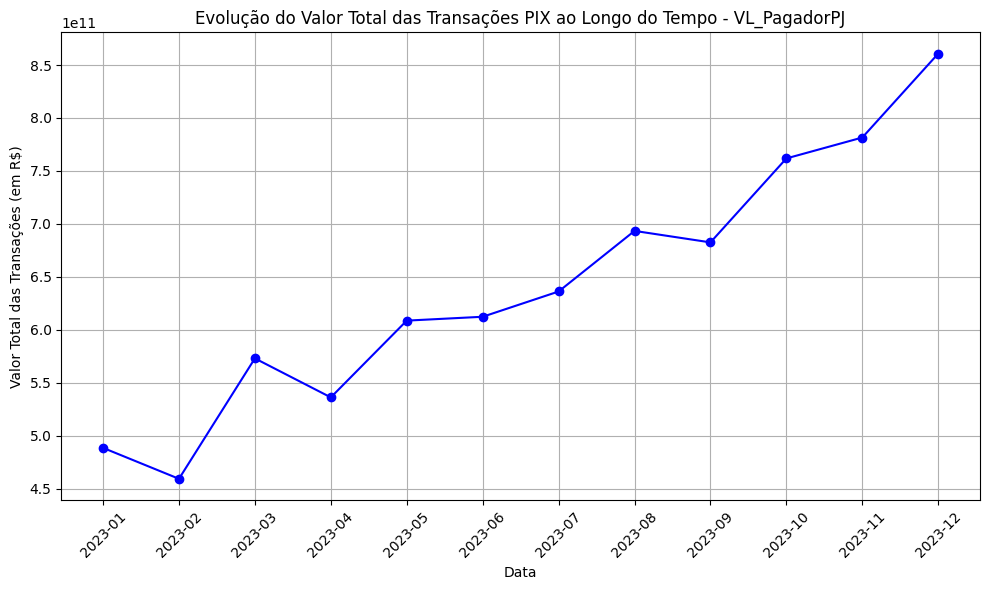

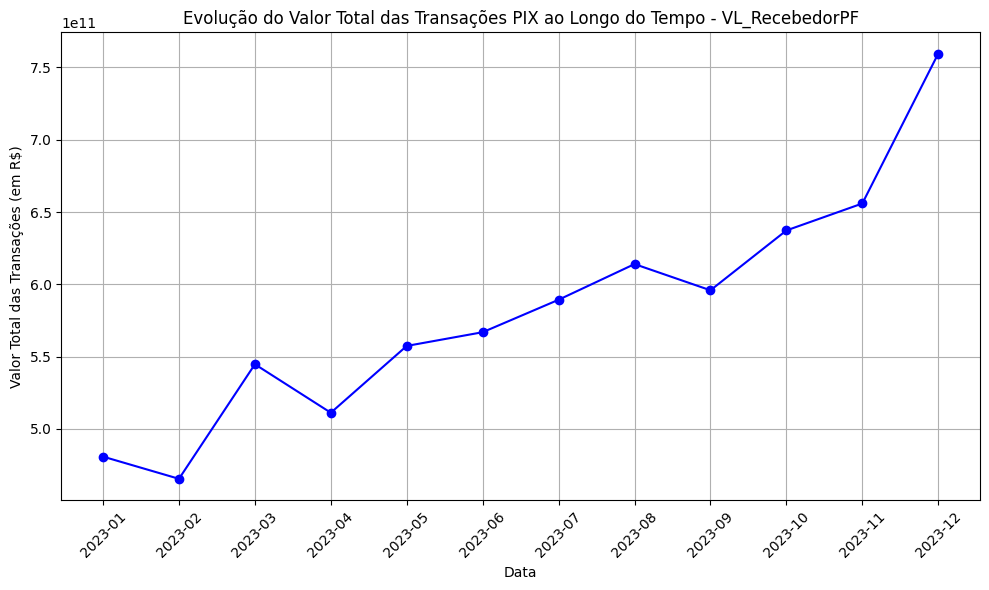

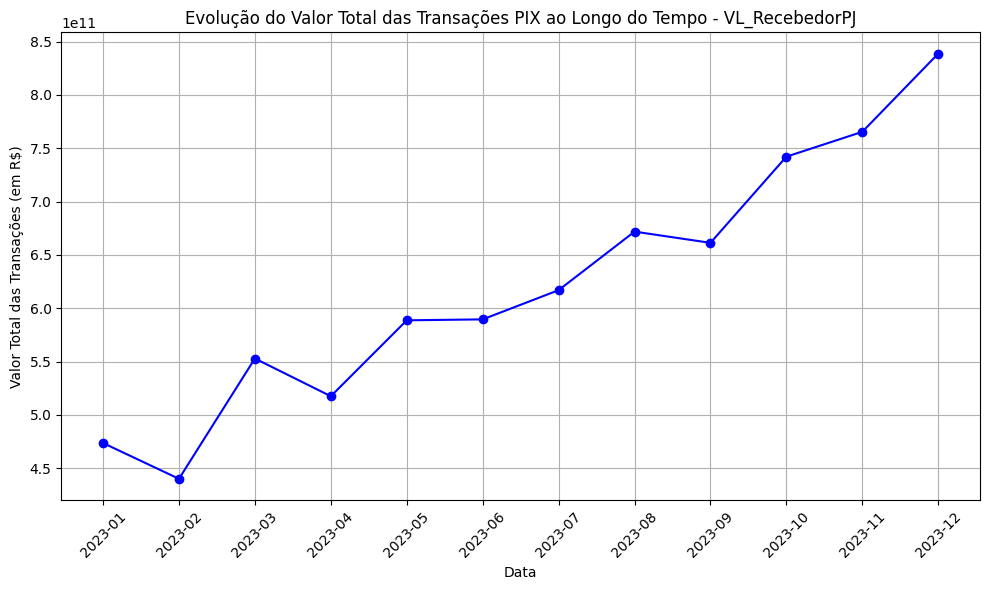

In [ ]:

for coluna in valores_por_mes.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(valores_por_mes.index, valores_por_mes[coluna], marker='o', linestyle='-', color='b')
    plt.title(f'Evolução do Valor Total das Transações PIX ao Longo do Tempo - {coluna}')
    plt.xlabel('Data')
    plt.ylabel('Valor Total das Transações (em R$)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#Conclusões

Após essa análise inicial do nosso dataset, pudemos chegar a algumas conclusões:

*   Em termos de quantidade, as pessoas físicas são os principais usuários de PIX para fazer e receber pagamentos;
*   Em termos de valor, a maior parte das operações é de valor baixo, cuja soma mensal de todo o munícipio não alcança R$1bi mensal;
*   As cidades com mais quantidade de operações são capitais de estados;
*   As cidades com maior valor das operações também são capitais, com a exceção de Barueri, que é um importante núcleo financeiro de São Paulo;
*   A quantidade de operações não está diretamente relacionada ao tamanho da população;
*   Em São Paulo as empresas utilizam PIX de valores extrememante altos, para pagar e receber;
*   As regiões Norte e Centro-Oeste ainda usam o PIX de maneira tímida e para valores baixos;
*   Apesar disso, capitais de todas as regiões estão presentes nos top 10 que mais utilizam o PIX como método de pagamento;
*   Ao contrário das nossas expectativas, o uso de PIX em termos de quantidade e valores, tanto por pessoas físicas quanto jurídicas, não acompanha as datas comemorativas;
*   Brasília estranhamente apresenta um número ridiculamente baixo de operações PIX para o ano, o que pode indicar alguma inconsistência no dataset.
*   Em termos gerais, o comportamento de pagadores e recebedores PF e PJ seguem o mesmo comportamento ao longo do ano. A única diferença marcante é que em dezembro as PJ apresentam uma alta acentuada nos recebimentos por PIX.


Apenas com base nesse dataset não é possível concluir com segurança as causas desse comportamento e, como analisamos apenas 1 ano, também não é possível afirmar com certeza que esse é um comportamento normal e esperado para os próximos anos.

O ideal é observar outros anos e também cruzar informações sobre outros métodos de pagamento para então elaborar um modelo mais preciso, a partir se pode tomar decisões com precisão.





